### Student details

Student name: Yan Wang

Student ID: 20121865

# Task 1: Perceptrons

* Weight/height Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [11]:
# import dependencies
import numpy as np

### Perceptron class
From: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

**Note:** The predict function returns either 1 or -1 as labels for the data. Therefore, the training data must match these labels.

In [21]:
class Perceptron1(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Read the data 
(provided - should be completed in previous E-tivity)

In [22]:
import pandas

# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('01_heights_weights_genders.csv',header=0)

X = data.iloc[:,1:3].values # X is the features in our dataset
y = data.iloc[:,0].values
# y is the Labels in our dataset, converted to integers
# Note the conversion to 1 and -1, to match the perceptron class
y = np.where(y == "Female", 1, -1)

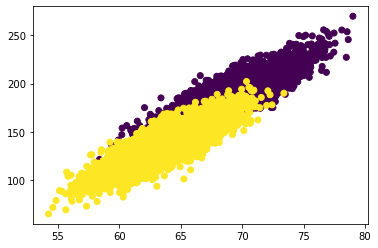

In [23]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],c=y);

### Train/Test Split 
(provided - should be completed in previous E-tivity)

In [24]:
# divide the dataset in train test using scikit learn
# now the model will train in training dataset and then we will use test dataset to predict its accuracy

from sklearn.model_selection import train_test_split

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

### Train the algorithm (Task)

In [25]:
################################
# Your code here
from sklearn.linear_model import Perceptron
model = Perceptron().fit(X_train,y_train)

### Calculate the accuarcy score using the test data and sklearn.metrics (Task)

In [26]:
################################
# Your code here
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)


0.8848484848484849


### Visualisations (Task)
1. Visualise the errors at each training epoch. Hint, the errors for each epoch are stored in the errors class variable
2. Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary. In this case, you will not be using the pandas dataframe, so it is probably better to use matplotlib

Text(0, 0.5, 'Errors')

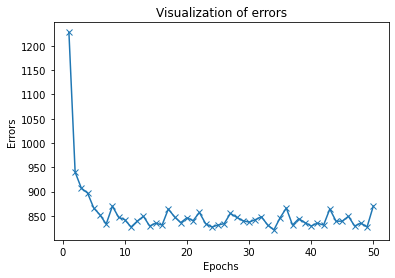

In [27]:
################################
# Your code here
ppn = Perceptron1(eta=0.1,epochs=50)
ppn.train(X_train, y_train)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='x')
plt.title('Visualization of errors')
plt.xlabel('Epochs')
plt.ylabel('Errors')

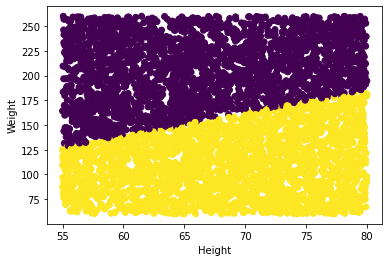

In [28]:
# create new 5000 samples 
sample=[]
for i in range(5000):
    temp=[np.random.uniform(55,80),np.random.uniform(60,260)]
    sample.append(temp)
# predict the random samples' gender
sample_pred = model.predict(sample)
# change list to np.array
sample = np.asarray(sample)
#print(sample_pred)
#print(sample)
#use matplotlib to plot sample 
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(sample[:,0], sample[:,1],c=sample_pred)

### Then, discuss the following in Markdown cells:
1.	Describe what is happening as the training progresses? 
2.	Do we arrive at the very best solution at the last epoch, or is there an epoch with a lower error? Why is that?
3.	Why can’t we get zero error with this data?


#### Answer:  
1. The number of errors dropped rapidly during the first few training epochs, then it remains fluctuating in the range of [800,900] in the following epochs.  
2. We don't arrive at the very best solution at the last epoch. And there is no epoch with a considerable lower error. Because the classes cannot be separated perfectly by a linear classifier, and some samples will always be misclassified in every epoch. So the perceptron can't converge and it will never stop updating the weights.  
3. Because convergence is one of the biggest problems of the perceptron. And with this data, the classes cannot be separated perfectly by a linear classifier,the perceptron can't converge and failed to find a decision boundary that are good enough to get zero error.